In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
train_data = pd.read_csv('/content/drive/MyDrive/Data/train.csv')

In [9]:
train_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [10]:
movie_data = pd.read_csv('/content/drive/MyDrive/Data/movies.csv')

In [11]:
movie_data.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [ ]:
#movie_data[movie_data['movieid']=="lara_croft_glimmer"]

array([[<Axes: title={'center': 'audienceScore'}>,
        <Axes: title={'center': 'runtimeMinutes'}>]], dtype=object)

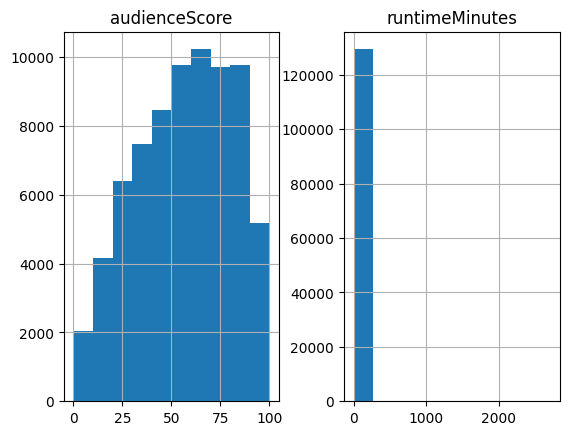

In [12]:
movie_data.hist()

In [13]:
movie_data['audienceScore'].replace(np.NaN,0,inplace=True)

In [14]:
movie_data.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,0.0,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [15]:
movie_data.shape

(143258, 14)

In [16]:
movie_data.nunique()

movieid                 126404
title                   126404
audienceScore              101
rating                      10
ratingContents            8353
releaseDateTheaters      12062
releaseDateStreaming      4726
runtimeMinutes             324
genre                     2912
originalLanguage           112
director                 62208
boxOffice                 4863
distributor               3694
soundType                  551
dtype: int64

In [17]:
movie_data.isnull().sum()

movieid                      0
title                        0
audienceScore                0
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

In [18]:
train_data.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [19]:
# creating a copy of original data
train_data1 = train_data.copy()

In [20]:
# To check variables data type
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [21]:
# To delete all those where any missing value
train_data1 = train_data1.dropna(axis=0)
train_data1.shape

(156311, 5)

In [22]:
# removing duplicate records
train_data.drop_duplicates(keep='first',inplace=True)
train_data1.shape

(156311, 5)

In [23]:
# Unique values of each columns
train_data1.nunique()

movieid                16412
reviewerName            4471
isFrequentReviewer         2
reviewText            155071
sentiment                  2
dtype: int64

In [24]:
# Finding shape of data after processing and cleaning
train_data1.shape

(156311, 5)

In [34]:
score = np.array([])
train_movie_iid = np.array(train_data1['movieid'].unique())
movie_iid = np.array(movie_data['movieid'])
audiance_sscore = np.array(movie_data['audienceScore'])

In [ ]:
for i in range(len(train_movie_iid)):
  cnt = 0
  scr = 0
  for j in range(len(movie_iid)):
    if train_movie_iid[i] == movie_iid[j] :
      cnt+=1
      scr+= audiance_sscore[j]
  scre = scr/cnt
  score = np.append(score,np.array([scre]),axis=0)
  print(i)

In [36]:
len(train_movie_iid)

16412

In [37]:
len(score)

16412

In [38]:
data4 = {'movie':train_movie_iid,'score':score}

In [39]:
score_dataframe = pd.DataFrame(data4)

In [40]:
score_dataframe.to_excel('score2.xlsx')

In [42]:
train_score = np.array([])
train_movie_iid = np.array(train_data1['movieid'])
score_movie_iid = np.array(score_dataframe['movie'])
audiance_sscore = np.array(score_dataframe['score'])

In [ ]:
for i in range(len(train_movie_iid)):
  for j in range(len(score_movie_iid)):
    if train_movie_iid[i] == score_movie_iid[j]:
      train_score = np.append(train_score,np.array([audiance_sscore[j]]),axis=0)
      break
  print(i)

In [44]:
len(train_score)

156311

In [45]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

In [46]:
train_data1 = pd.get_dummies(train_data1, columns=['isFrequentReviewer'], prefix=['one_hot'])

In [47]:
train_data1.insert(1,'Score',train_score)

In [48]:
train_data1.head()

,movieid,Score,reviewerName,reviewText,sentiment,one_hot_False,one_hot_True
0,marvelous_pirate,65.0,Benjamin Henry,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,1,0
1,tony_montana_frodo_baggins_v_rocky_balboa,23.5,Felicia Lopez,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,1,0
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,80.0,Mr. Charles Burgess,Creed II does not give us anything but another...,POSITIVE,0,1
3,lara_croft_glimmer,16.0,Ryan Barrett,"I know what you're thinking, but this is no Li...",POSITIVE,1,0
4,jason_bourne_surreal_the_terminator_indiana_jones,97.0,Alexander Glover,Director Fernando Meirelles tells the story wi...,POSITIVE,1,0


In [49]:
# Training Dataset
x_train = train_data1.drop(columns='sentiment')
x_train.shape

(156311, 6)

In [50]:
x_train

,movieid,Score,reviewerName,reviewText,one_hot_False,one_hot_True
0,marvelous_pirate,65.0,Benjamin Henry,Henry Selick’s first movie since 2009’s Corali...,1,0
1,tony_montana_frodo_baggins_v_rocky_balboa,23.5,Felicia Lopez,With a cast that reads like the Vogue Oscar pa...,1,0
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,80.0,Mr. Charles Burgess,Creed II does not give us anything but another...,0,1
3,lara_croft_glimmer,16.0,Ryan Barrett,"I know what you're thinking, but this is no Li...",1,0
4,jason_bourne_surreal_the_terminator_indiana_jones,97.0,Alexander Glover,Director Fernando Meirelles tells the story wi...,1,0
...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,34.0,Danny Mueller,A top-notch thriller with genuine surprises an...,1,0
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,20.0,Jennifer Clayton,Some people find Derek Zoolander funny and lik...,0,1
162755,infinite_enigma_luke_skywalker,78.0,Bryan Wilson,"This fun, gentle comedy focuses mainly on them...",1,0
162756,emerald_oracle_iron_man_wolverine,39.0,Erik Parker,"The film is rescued by a strong third act, but...",1,0


In [51]:
x_train.nunique()

movieid           16412
Score               683
reviewerName       4471
reviewText       155071
one_hot_False         2
one_hot_True          2
dtype: int64

In [52]:
# Label Vectot
y_train = y_train = train_data1['sentiment']
y_train.shape

(156311,)

In [53]:
y_train

0         POSITIVE
1         NEGATIVE
2         POSITIVE
3         POSITIVE
4         POSITIVE
            ...   
162753    POSITIVE
162754    NEGATIVE
162755    POSITIVE
162756    NEGATIVE
162757    POSITIVE
Name: sentiment, Length: 156311, dtype: object

In [54]:
xx_train = train_data1.drop(columns=['sentiment','movieid','reviewerName','reviewText'])

In [55]:
xx_train

,Score,one_hot_False,one_hot_True
0,65.0,1,0
1,23.5,1,0
2,80.0,0,1
3,16.0,1,0
4,97.0,1,0
...,...,...,...
162753,34.0,1,0
162754,20.0,0,1
162755,78.0,1,0
162756,39.0,1,0


In [56]:
yy_train = y_train.copy()

In [57]:
yy_train.replace('POSITIVE',1,inplace=True)

In [58]:
yy_train.replace('NEGATIVE',0,inplace=True)

In [59]:
yy_train

0         1
1         0
2         1
3         1
4         1
         ..
162753    1
162754    0
162755    1
162756    0
162757    1
Name: sentiment, Length: 156311, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(xx_train,yy_train)

LinearRegression()

In [62]:
test_data = pd.read_csv('/content/drive/MyDrive/Data/test.csv')

In [63]:
test_data

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...
...,...,...,...,...
55310,celestial_radiant,Jose Mccormick,False,Ron Howard delivers an unconventional romantic...
55311,vivid_james_t._kirk,Thomas Osborne,False,As an oddball art film that openly invites you...
55312,scarlett_o'hara_neo_scarlett_o'hara_infinite,Julie Kirby,False,Nicholson wears his devilish grin from his fir...
55313,terminator_epic_rocky_balboa_mystic,Tina Sutton,True,It's hard not be entertained by two dozen of C...


In [64]:
from sklearn.linear_model import RidgeClassifier
ridge_classifier = RidgeClassifier()

In [65]:
ridge_classifier.fit(xx_train,yy_train)

RidgeClassifier()

In [66]:
ridge_classifier.predict(xx_train)

array([1, 0, 1, ..., 1, 1, 1])

In [67]:
ridge_classifier.score(xx_train,yy_train)

0.6686797474266046